# ANALYSIS

## SET UP

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

import warnings
warnings.filterwarnings('ignore')

%config IPCompleter.greedy=True

pd.options.display.max_columns = None

## DATA LOADING

In [25]:
data_file_name='crypto_historical_data.pickle'

path= '../../02_Data/03_Final/' + data_file_name

historical_data = pd.read_pickle(path)

In [26]:
historical_data

,asset,date,open,high,low,close,EMA_50,EMA_200,bullish,crossover,annual_historical_volatility
0,ADA,2018-04-17,0.25551,0.28800,0.23983,0.24260,NaN,NaN,0.0,NaN,NaN
1,ADA,2018-04-18,0.24260,0.26460,0.24201,0.26200,NaN,NaN,0.0,0.0,NaN
2,ADA,2018-04-19,0.26199,0.27500,0.25777,0.27004,NaN,NaN,0.0,0.0,NaN
3,ADA,2018-04-20,0.27004,0.30442,0.26648,0.30108,NaN,NaN,0.0,0.0,NaN
4,ADA,2018-04-21,0.30161,0.30700,0.26509,0.28668,NaN,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
20639,XRP,2024-11-15,0.77360,0.92790,0.77040,0.89220,0.577972,0.557558,1.0,0.0,0.988647
20640,XRP,2024-11-16,0.89210,1.26980,0.87780,1.12090,0.599263,0.563163,1.0,0.0,1.377950
20641,XRP,2024-11-17,1.12080,1.16030,1.00260,1.05430,0.617108,0.568050,1.0,0.0,1.437209
20642,XRP,2024-11-18,1.05450,1.18650,1.05430,1.11370,0.636582,0.573480,1.0,0.0,1.435792


## ANALYSIS

### Analysis of Price Pattern

**Which assets follow a pattern similar to Bitcoin? Which ones do not?**

First, we need to create a dataset with a consistent time range for all cryptocurrencies. It’s not practical to have BTC data starting in 2017 while more recent cryptocurrencies have data starting later.

Therefore, we need to find the asset with the most recent start date and adjust all assets' data to match it.

In [27]:
list_of_assets=historical_data.asset.unique()
list_of_assets

array(['ADA', 'AVAX', 'BNB', 'BTC', 'DOGE', 'ETH', 'SOL', 'SUI', 'TRX',
       'XRP'], dtype=object)

In [28]:
historical_data.groupby('asset')['date'].min().sort_values()

asset
BTC    2017-08-17
ETH    2017-08-17
BNB    2017-11-06
ADA    2018-04-17
XRP    2018-05-04
TRX    2018-06-11
DOGE   2019-07-05
SOL    2020-08-11
AVAX   2020-09-22
SUI    2023-05-03
Name: date, dtype: datetime64[ns]

As we can see, the most recent asset is SUI, with a start date of 2023-05-03. However, a period of just a year and a half is not enough to assess correlation. So, we will use AVAX, which has a start date of 2020-09-22, as the baseline for all assets.

In [29]:
historical_data.loc[(historical_data.date > '2020-09-22')]

,asset,date,open,high,low,close,EMA_50,EMA_200,bullish,crossover,annual_historical_volatility
890,ADA,2020-09-23,0.08148,0.08280,0.07545,0.07663,0.104714,0.089995,1.0,0.0,0.890420
891,ADA,2020-09-24,0.07663,0.08376,0.07549,0.08254,0.103845,0.089921,1.0,0.0,0.894025
892,ADA,2020-09-25,0.08254,0.09867,0.08233,0.09693,0.103574,0.089991,1.0,0.0,1.075557
893,ADA,2020-09-26,0.09691,0.09997,0.09226,0.09547,0.103256,0.090045,1.0,0.0,1.073322
894,ADA,2020-09-27,0.09541,0.10273,0.09419,0.10130,0.103179,0.090157,1.0,0.0,1.101478
...,...,...,...,...,...,...,...,...,...,...,...
20639,XRP,2024-11-15,0.77360,0.92790,0.77040,0.89220,0.577972,0.557558,1.0,0.0,0.988647
20640,XRP,2024-11-16,0.89210,1.26980,0.87780,1.12090,0.599263,0.563163,1.0,0.0,1.377950
20641,XRP,2024-11-17,1.12080,1.16030,1.00260,1.05430,0.617108,0.568050,1.0,0.0,1.437209
20642,XRP,2024-11-18,1.05450,1.18650,1.05430,1.11370,0.636582,0.573480,1.0,0.0,1.435792


We create the two EMA data files.


In [30]:
EMA_200_corr=historical_data.loc[(historical_data.date > '2020-09-22') & (historical_data.asset != 'SUI')][['date','asset','EMA_200']] \
.set_index(['date','asset']).EMA_200.unstack('asset').dropna()

In [31]:
EMA_50_corr=historical_data.loc[(historical_data.date > '2020-09-22') & (historical_data.asset != 'SUI')][['date','asset','EMA_50']] \
.set_index(['date','asset']).EMA_50.unstack('asset').dropna()

Let’s analyze the correlation graphically.

In [32]:
EMA_50_corr

asset,ADA,AVAX,BNB,BTC,DOGE,ETH,SOL,TRX,XRP
date,,,,,,,,,
2020-11-10,0.101945,4.039311,28.112878,12815.177538,0.002681,392.313910,2.169759,0.026006,0.247694
2020-11-11,0.102104,4.017542,28.109079,12927.689791,0.002684,395.089443,2.163102,0.025965,0.248012
2020-11-12,0.102202,3.994278,28.092543,13059.618035,0.002688,397.728680,2.153133,0.025924,0.248282
2020-11-13,0.102362,3.981737,28.096655,13187.503602,0.002693,400.815006,2.147681,0.025903,0.248973
2020-11-14,0.102431,3.962430,28.090162,13300.560323,0.002696,403.170889,2.138682,0.025873,0.249729
...,...,...,...,...,...,...,...,...,...
2024-11-15,0.414866,27.789758,589.625162,71755.501003,0.189855,2722.742927,174.315312,0.163203,0.577972
2024-11-16,0.427679,28.078002,590.921823,72493.988023,0.196693,2738.826342,175.938633,0.164654,0.599263
2024-11-17,0.438461,28.338081,592.019006,73174.850845,0.203373,2752.048838,178.351628,0.166013,0.617108


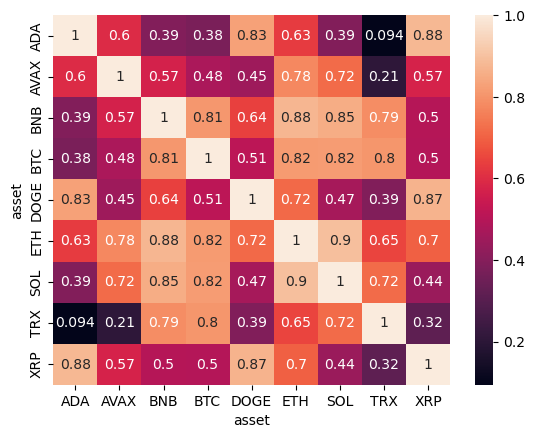

In [33]:
sns.heatmap(EMA_50_corr.corr(), annot=True);

The number of cells is too high, and since we’re only interested in the correlation between BTC and the others, we’ll index the result.

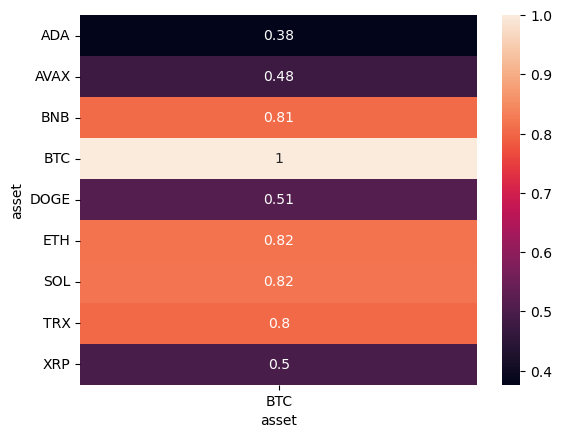

In [34]:
sns.heatmap(EMA_50_corr.corr()[['BTC']], annot=True)
plt.yticks(rotation=360);

It appears that correlation is high for BNB,ETH,SOL and TRX in the 50-session EMA. Let’s see if it holds in the 200-session EMA.

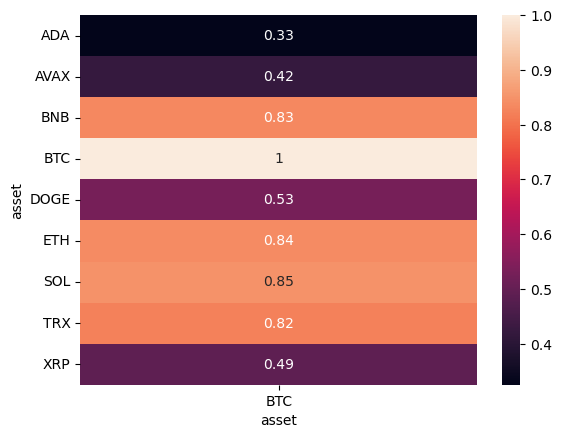

In [36]:
sns.heatmap(EMA_200_corr.corr()[['BTC']], annot=True)
plt.yticks(rotation=360);

**Insight 1: The highest correlation with Bitcoin is found in BNB, ETH, SOL and TRX, with values above 80% in the 50-session EMA and over 82% in the 200-session EMA.**

**Are assets with a similar pattern to Bitcoin more profitable than those without?**

First, we create a column with normalized closing data for each asset.

In [38]:
close_prices=historical_data.loc[(historical_data.date > '2020-09-22') & (historical_data.asset != 'SUI')][['date','asset','close']] \
.set_index(['date','asset']).close.unstack('asset')
close_prices

asset,ADA,AVAX,BNB,BTC,DOGE,ETH,SOL,TRX,XRP
date,,,,,,,,,
2020-09-23,0.07663,3.5350,22.8331,10241.46,0.002544,320.72,2.8548,0.02486,0.22164
2020-09-24,0.08254,4.6411,24.5745,10736.32,0.002630,348.97,3.1433,0.02625,0.23276
2020-09-25,0.09693,4.7134,24.6924,10686.67,0.002701,351.92,3.1937,0.02714,0.24154
2020-09-26,0.09547,4.5200,26.1998,10728.60,0.002697,353.92,3.1287,0.02718,0.24153
2020-09-27,0.10130,4.6484,26.2510,10774.25,0.002695,357.49,3.1578,0.02659,0.24334
...,...,...,...,...,...,...,...,...,...
2024-11-15,0.70710,33.1300,619.3700,91032.07,0.381500,3090.01,218.4500,0.19120,0.89220
2024-11-16,0.74160,35.1400,622.6900,90586.92,0.364210,3132.87,215.7100,0.20020,1.12090
2024-11-17,0.70260,34.7100,618.9000,89855.99,0.367040,3076.00,237.4700,0.19930,1.05430


We normalize to 100 and plot the data.

In [39]:
close_prices.iloc[0]

asset
ADA         0.076630
AVAX        3.535000
BNB        22.833100
BTC     10241.460000
DOGE        0.002544
ETH       320.720000
SOL         2.854800
TRX         0.024860
XRP         0.221640
Name: 2020-09-23 00:00:00, dtype: float64

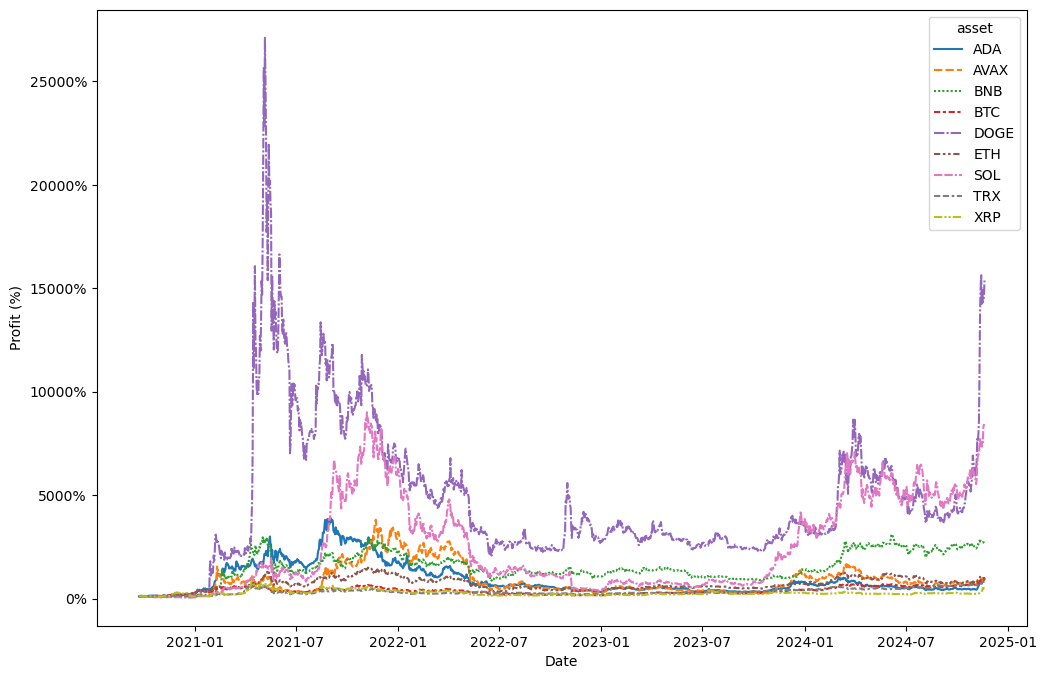

In [40]:
plt.figure(figsize=(12,8))
sns.lineplot(data=(close_prices/close_prices.iloc[0] * 100))

# Format the Y axis as percentage
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))

plt.xlabel("Date")
plt.ylabel("Profit (%)");

In [41]:
(close_prices/close_prices.iloc[0]).to_excel('../../02_Data/03_Final/Rentabilidad_grafico.xlsx',sheet_name='Rentabilidad')

In terms of gross returns, DOGE and SOL stand out, followed at a distance by BNB.

In [42]:
returns=close_prices.apply(lambda x: round((((x[-1]/x[0])-1) * 100),2)).sort_values(ascending=False)
returns

asset
DOGE    15273.76
SOL      8273.97
BNB      2586.28
ETH       868.70
AVAX      867.47
ADA       852.89
BTC       797.29
TRX       711.34
XRP       389.89
dtype: float64

**Insight 2: We can definitively confirm that DOGE, SOL, and BNB are the assets with the highest returns.**

Assuming we have a perfectly balanced portfolio, from 09-23-2020, **the average return of the group of assets correlated with BTC (SOL, BNB, ETH, and TRX) yields an average return of 2647.51 %.**

In contrast, **the average return of the group not correlated with BTC would offer us an average return of 4346 %.**

**Among the assets that follow a pattern similar to BTC, are there any that outperform its returns?**

In [44]:
close_prices.apply(lambda x: round((((x[-1]/x[0])-1) * 100),2)).sort_values(ascending=False)\
[['BTC','SOL','ETH','BNB','TRX']].sort_values(ascending=False)

asset
SOL    8273.97
BNB    2586.28
ETH     868.70
BTC     797.29
TRX     711.34
dtype: float64

**Insight 3: We can confirm that SOL, BNB, and ETH have shown better performance over the same period.**

### Analysis of Volatility

**What is the ranking of assets based on volatility**

First, we create the volatility dataset.

In [45]:
annual_historical_volatility=historical_data.loc[(historical_data.date > '2020-09-22') & (historical_data.asset != 'SUI')][['date','asset','annual_historical_volatility']] \
.set_index(['date','asset']).annual_historical_volatility.unstack('asset')
annual_historical_volatility

asset,ADA,AVAX,BNB,BTC,DOGE,ETH,SOL,TRX,XRP
date,,,,,,,,,
2020-09-23,0.890420,NaN,1.450832,0.381491,0.442318,0.972679,2.794275,1.155780,0.539267
2020-09-24,0.894025,NaN,1.477241,0.414930,0.430856,1.053269,2.828085,1.127311,0.556852
2020-09-25,1.075557,NaN,1.430745,0.396222,0.419143,0.885351,2.563158,0.933454,0.511741
2020-09-26,1.073322,NaN,1.221091,0.395325,0.417257,0.857024,2.449662,0.900500,0.510064
2020-09-27,1.101478,NaN,1.209320,0.393380,0.413870,0.857877,2.433574,0.884014,0.509683
...,...,...,...,...,...,...,...,...,...
2024-11-15,1.457118,1.016966,0.496852,0.678757,1.814849,0.792752,0.790082,0.688370,0.988647
2024-11-16,1.453971,1.035767,0.496063,0.684568,1.866121,0.792764,0.791693,0.704290,1.377950
2024-11-17,1.504849,1.043190,0.491332,0.688532,1.849114,0.800967,0.880029,0.706179,1.437209


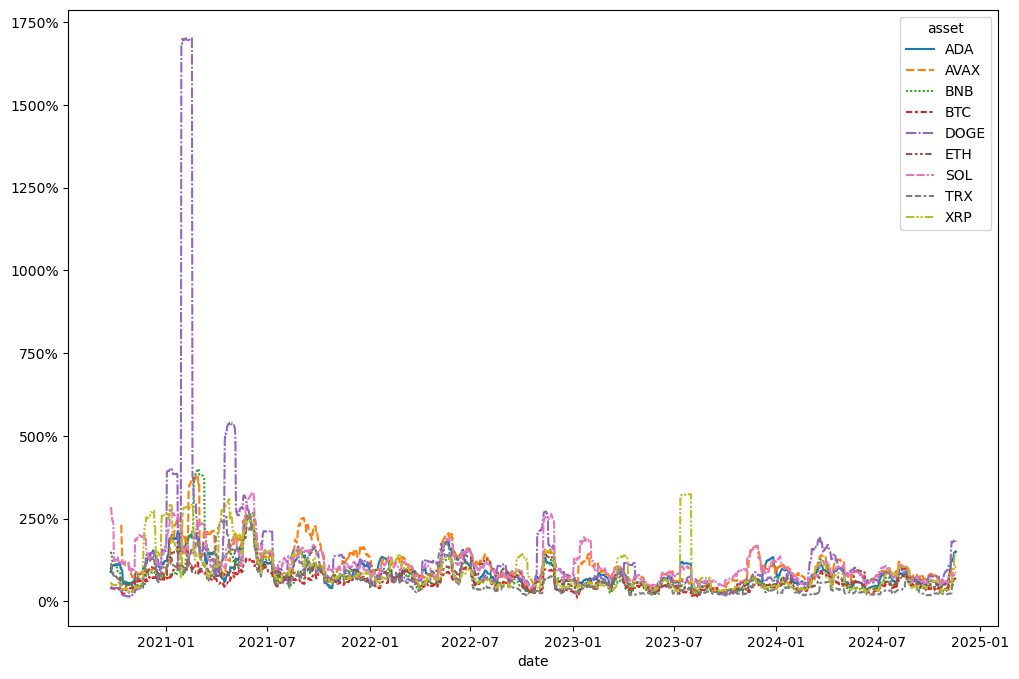

In [46]:
plt.figure(figsize=(12,8))
sns.lineplot(data=annual_historical_volatility)
           
# Format the Y axis as percentage
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1));

We observe that the volatilities are quite similar, except for specific spikes in DOGE. Let’s review what happened between January and July 2021.

In [48]:
temp=annual_historical_volatility['2021-01-01':'2021-07-01']['DOGE']

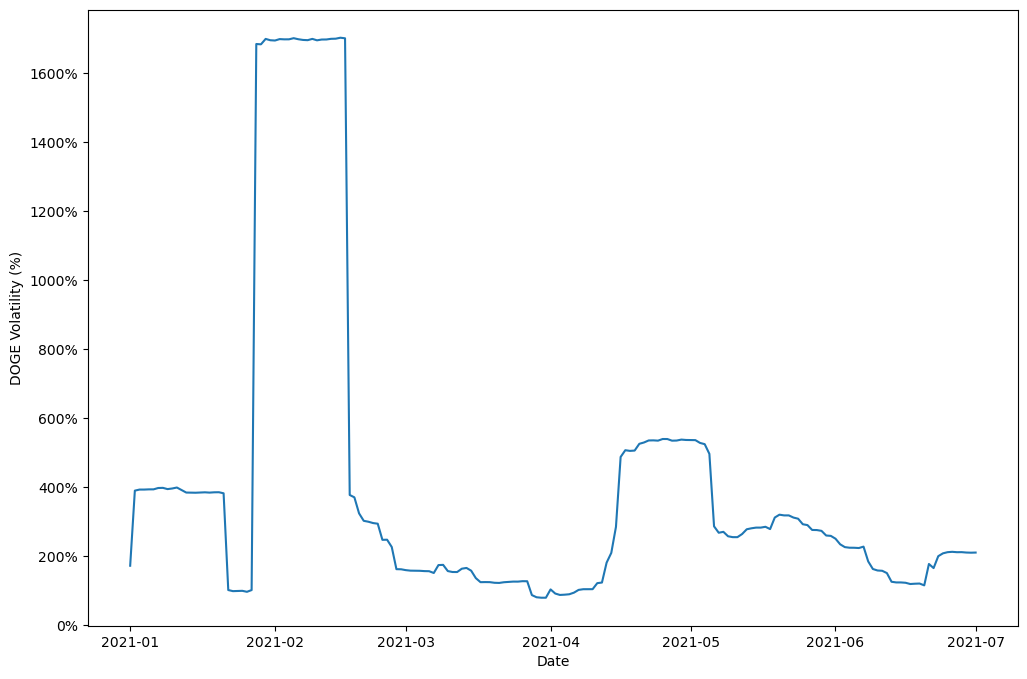

In [49]:
plt.figure(figsize=(12,8))
sns.lineplot(data=temp)

# Format the Y axis as percentage
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

plt.xlabel("Date")
plt.ylabel("DOGE Volatility (%)");

We see that there was extreme volatility in February 2021. Reviewing documentation, we find that during that time there was a bull rally driven by Elon Musk’s promotion of DOGECOIN on Twitter.

https://cointelegraph.com/news/ur-welcome-doge-soars-after-elon-musk-returns-to-twitter-to-shill-dogecoin

Since we can't draw a clear conclusion visually, let's conduct a detailed statistical analysis.

In [50]:
annual_historical_volatility.describe().T[['mean','std','50%']].sort_values(by='mean')

,mean,std,50%
asset,,,
BTC,0.578864,0.222225,0.547769
TRX,0.638308,0.465757,0.474984
BNB,0.727795,0.524835,0.601554
ETH,0.731121,0.329951,0.677503
ADA,0.868270,0.416225,0.781476
XRP,0.909755,0.657897,0.673756
AVAX,1.084226,0.567383,0.931505
SOL,1.120050,0.513156,0.998651
DOGE,1.247028,1.983676,0.790536


**Insight 1: BTC leads the volatility ranking, showing the lowest average value at 57.88%.**

**Are there assets with a volatility pattern similar to BTC? Do these overlap with assets that have a similar price pattern?**

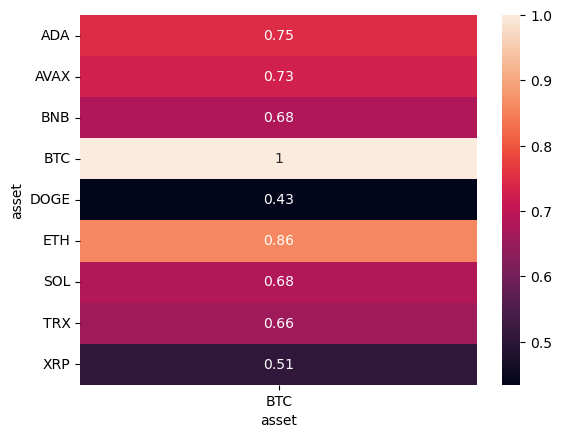

In [51]:
sns.heatmap(annual_historical_volatility.corr()[['BTC']], annot=True)
plt.yticks(rotation=360);

**Insight 2: Only ETH has a volatility pattern similar to BTC. This asset also belongs to the group of assets with a similar price evolution pattern.**

**Does higher volatility indicate better annual returns? Are they correlated?**

We start by building the dataset of annual historical returns.

In [53]:
annual_historical_returns=historical_data.loc[(historical_data.date > '2020-09-22') & (historical_data.asset != 'SUI'),['asset','date','close']]
annual_historical_returns

,asset,date,close
890,ADA,2020-09-23,0.07663
891,ADA,2020-09-24,0.08254
892,ADA,2020-09-25,0.09693
893,ADA,2020-09-26,0.09547
894,ADA,2020-09-27,0.10130
...,...,...,...
20639,XRP,2024-11-15,0.89220
20640,XRP,2024-11-16,1.12090
20641,XRP,2024-11-17,1.05430
20642,XRP,2024-11-18,1.11370


In [54]:
annual_historical_returns['annual_historical_returns'] = np.nan

In [55]:
list_of_assets=list(list_of_assets)

In [56]:
list_of_assets.remove('SUI')

In [57]:
list_of_assets

['ADA', 'AVAX', 'BNB', 'BTC', 'DOGE', 'ETH', 'SOL', 'TRX', 'XRP']

In [58]:
for currency in list_of_assets:
    
    
    #calculate the annual historical returns
    annual_historical_returns.loc[annual_historical_returns.asset==currency,'annual_historical_returns']= \
    annual_historical_returns.close.pct_change(periods=20)

In [59]:
annual_historical_returns.drop(columns='close',inplace=True)

In [60]:
annual_historical_returns=annual_historical_returns.set_index(['date','asset']).annual_historical_returns.unstack('asset')

Once the dataset is ready, we need to calculate the correlation for each asset. We’ll store the data in a dictionary.

In [61]:
#creamos un dataset temporal vacío
temp=pd.DataFrame(columns=['annual_historical_returns','annual_historical_volatility'])

In [62]:
#creamos el diccionario de correlaciones
correlations={}

In [63]:
for crypto in list_of_assets:
    
    #añadimos los datos históricos de volatilidad y retorno
    temp['annual_historical_returns']=annual_historical_returns[crypto]
    temp['annual_historical_volatility']=annual_historical_volatility[crypto]
    
    #añadimos la correlacion al diccionario
    correlations[crypto]=temp.corr().iloc[0,1].round(2)
    

In [64]:
pd.DataFrame(data=correlations,index=[0])

,ADA,AVAX,BNB,BTC,DOGE,ETH,SOL,TRX,XRP
0,0.4,0.44,0.48,-0.11,0.82,0.03,0.21,0.19,0.42


**Insight 3: We can conclude that there is no correlation between volatility and return, except for DOGE. Therefore, higher volatility does not generally imply higher gains.**

**Which assets show higher profitability with lower volatility?Is BTC the best asset for medium- and long-term investment based on these profitability and volatility criteria?**

In [66]:
returns=returns.reset_index().set_index('asset').sort_index()

In [67]:
returns.columns=['returns']

In [68]:
returns

,returns
asset,
ADA,852.89
AVAX,867.47
BNB,2586.28
BTC,797.29
DOGE,15273.76
ETH,868.70
SOL,8273.97
TRX,711.34
XRP,389.89


In [69]:
temp=pd.concat([returns, annual_historical_volatility.describe().T[['mean']].sort_index()],axis=1) \
.sort_values(by='returns', ascending=False)
temp

,returns,mean
asset,,
DOGE,15273.76,1.247028
SOL,8273.97,1.120050
BNB,2586.28,0.727795
ETH,868.70,0.731121
AVAX,867.47,1.084226
ADA,852.89,0.868270
BTC,797.29,0.578864
TRX,711.34,0.638308
XRP,389.89,0.909755


**Insight 4: BNB, ETH, and BTC are the assets that show the best balance between profitability and volatility. We will likely choose BTC as a long-term investment asset due to its balance in these aspects, along with its greater market acceptance and inclusion in institutional portfolios.**

**Does the group of assets that follow BTC’s pattern (in terms of price and volatility) have higher profitability than those that do not follow the same pattern?**

In [71]:
temp.loc[['BTC','ETH','BNB'],'returns'].mean().round(2)

1417.42

In [72]:
temp.loc[['ADA', 'AVAX', 'DOGE', 'SOL', 'TRX', 'XRP'],'returns'].mean().round(2)

4394.89

**Insight 5: BTC,ETH and BNB do not show the highest returns compared to other assets. The average return for this group is 1417.42%, while the average for the rest of the assets is 4394.89%.**

**However, we can affirm that BTC, ETH and BNB offer greater price stability, with 57.88%, 73.11% and 72.77% volatility, respectively.**